# <b> Play Store App popularity Prediction

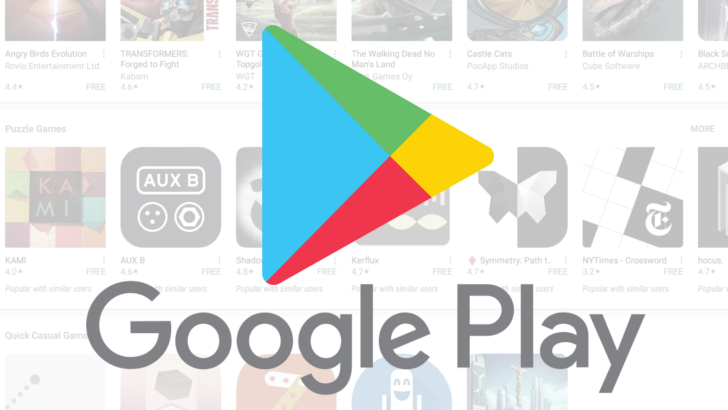

Any app or game is known for its popularity depending on the ratings of the app. Every app store has large amount of user data and app data that can stand as a very important factor to understand the success or failure of a app in an app store. Similarly, In this project, we would try to explore and analyze using machine learning, data science on data scrapped from Google Play Store.<br>
Google playstore data has high potential to drive up businesses which are wholely dependent on app. Important features of app or user can be observed from this data and great insights can be provided for the development of the app. This data is scrapped from Google and it has details about 10000 playstore apps and it contains more than 10000 rows with 13 columns of data. We also have another data file showing the reviews given by users so sentiment can also be observed from this.

<b> Questions to answer:</b>

<i><b>The main question to answer would be:<br> Can the popularity of a app be predicted using other features of the app so that higher investments and advancements can be perfomed on the app?</b></i>
*   How successfully can we predict the popularity of a app?
*   What are the important features that can be observed from this data of 13 columns?
*   Is there any one attribute that plays the major role in deciding the popularity?
*   Can tranformed principal components help in increasing the performance of any model?
*   What are the reasons for the increase in popularity of an app?
*   What are some noteworthy patterns in user behaviour and app usage sentiment that we can see?
*   Can we finally predict app popularity with some assurance from given a set of features about the app?

Mobile app market has picked up some pace from the last 5 years and the revenue rate of market still grows by ~35% an year and the analysis of apps for such growth is necessary so I would believe that this analysis performed on the google apps data can be further improved and scaled to improve some of the industrial standards and business enhancements like:

*   Prediction of popularity of the app can increase the revenue being generated and this analysis can be used to optimize the investment strategy to only invest for the development of required apps.
*   Also some fake apps can be removed from playstore by this analysis.
*   Some different market segments for the growth of app in those segments can be explored which were not done in the past.









In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
play_store = pd.read_csv("/content/drive/MyDrive/Freelance/Playstore apps rating prediction/googleplaystore.csv")

In [5]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Here we can observe all the 13 columns present in the data, we are trying to solve the problem by finding the popularity of apps in the data and popularity of each app can be observed by the number of `installs` of the app. As the popularity of an app increases, the number of installations also increase so this would be our target column.
- So this `installs` column needs to be converted into some popularity categories and used as a categorical variable to decide popularity of an app.

In [6]:
# checking shape of data
play_store.shape

(10841, 13)

In [7]:
# checking for the number of unique apps
play_store.App.nunique()

9660

In [8]:
def check_data_describing(df):
  print(df.shape)
  print('\n*********************************')
  print(df.describe().transpose())
  print('\n *********************************')
  print(df.info())

check_data_describing(play_store)

(10841, 13)

*********************************
         count      mean       std  min  25%  50%  75%   max
Rating  9367.0  4.193338  0.537431  1.0  4.0  4.3  4.5  19.0

 *********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: flo

- We can observe that there is only one numeric column and all other columns are object columns.

In [9]:
categorical = play_store.dtypes[play_store.dtypes == "object"].index
play_store[categorical].describe().transpose()

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


- We can observe that there are 9660 unique apps in the data
- The top number of installations has crossed one million for some apps

In [10]:
# writing a function to check the following: data types, unique values, null values, duplicates
def dirty_data_finding(df):
    dirty_data = []
    columns = df.columns
    for col in columns:
        nunique = df[col].nunique()
        duplicates = df[col].duplicated().sum()
        null = df[col].isnull().sum()
        dtype = df[col].dtypes
        dirty_data.append([col,dtype,nunique,null,duplicates])
    df_dirty_data_finding = pd.DataFrame(dirty_data)
    df_dirty_data_finding.columns = ['column','dtype','nunique','null','duplicates']
    return df_dirty_data_finding

dirty_data_finding(play_store)

,column,dtype,nunique,null,duplicates
0,App,object,9660,0,1181
1,Category,object,34,0,10807
2,Rating,float64,40,1474,10800
3,Reviews,object,6002,0,4839
4,Size,object,462,0,10379
5,Installs,object,22,0,10819
6,Type,object,3,1,10837
7,Price,object,93,0,10748
8,Content Rating,object,6,1,10834
9,Genres,object,120,0,10721


- We can observe that are only fewer null values in columns like current ver, Android ver, content rating and type but most number of null values are present in the ratings column.

In [11]:
for e in play_store.columns:
  print(e)
  print(play_store[e].value_counts())
  print('\n**********************************\n')

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

**********************************

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE         

In [12]:
# removing null values
play_store.dropna(inplace=True)

In [13]:
dirty_data_finding(play_store)

,column,dtype,nunique,null,duplicates
0,App,object,8190,0,1170
1,Category,object,33,0,9327
2,Rating,float64,39,0,9321
3,Reviews,object,5990,0,3370
4,Size,object,413,0,8947
5,Installs,object,19,0,9341
6,Type,object,2,0,9358
7,Price,object,73,0,9287
8,Content Rating,object,6,0,9354
9,Genres,object,115,0,9245


- Now we can observe that all the null values have been removed from the data

In [14]:
# Removing columns which are not required
not_required=['Current Ver','Last Updated', 'Android Ver']
play_store = play_store.drop(not_required, axis = 1)
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


<b> Converting data into the required types

<b> Reviews column

In [15]:
# converting the reviews to int from object
play_store = play_store.astype({'Reviews': 'int32'})

<b> Installs column

In [16]:
play_store['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

- We can also convert this Installs column into numeric first by removing the special character that are appended to the numbers

In [17]:
# we can use regex for this to replace , and + 
play_store['Installs'] = play_store['Installs'].replace('[\,]', '', regex = True).replace('[\+]', '', regex = True).astype(int)

In [18]:
play_store['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

- Now the , and + are removed from the numbers 

In [19]:
# Now, we will look into other columns
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity


<b> Type column

In [20]:
play_store.Type.value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

- we can observe that there are two categories in the Type column so we can encode this column and replace the Free value with 0 and Paid value with 1.

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
play_store['Type'] = labelencoder.fit_transform(play_store['Type'])

<b> Price column

In [22]:
play_store.Price.value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

- We can observe that there is a dollar symbol attached and it needs to be removed from prices

In [23]:
# regex can be used to remove the $ symbol along with the replace function
play_store["Price"] = play_store["Price"].replace('[\$,]', '', regex=True).astype(float)

In [24]:
play_store.Price.value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

<b> Content Rating column

In [25]:
play_store['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

- We can observe that there is one column belonging to underrated so we can observe this column and try to impute it

In [26]:
play_store[play_store["Content Rating"] == "Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,50000,0,0.0,Unrated,Tools


In [27]:
# we will tyr to impute the missing value by using the most_frequent value of the column that is most probably everyone
from sklearn.impute import SimpleImputer
imputer_CR = SimpleImputer(missing_values="Unrated", strategy = "most_frequent")
imputer_CR.fit(pd.DataFrame(play_store["Content Rating"]))
play_store["Content Rating"] = imputer_CR.transform(pd.DataFrame(play_store["Content Rating"]))

In [28]:
play_store['Content Rating'].value_counts()

Everyone           7415
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Name: Content Rating, dtype: int64

- As the content rating column is similar to a age column as it has divisons for ages so we can try to consider it as a ordered column and try to encode it following an order, we will not be using label encoder as it encodes using alphabetical order so we will try to use replace() function to replace using our required order.

In [29]:
di={'Everyone':0, 'Everyone 10+':10, 'Teen':13, 'Mature 17+':17, 'Adults only 18+':18}
play_store=play_store.replace({"Content Rating":di})

In [30]:
play_store['Content Rating'].value_counts()

0     7415
13    1084
17     461
10     397
18       3
Name: Content Rating, dtype: int64

<b> Size column

In [31]:
play_store.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

- We can observe that some categories are like varies with device, these are similar to Nan values so neds to be handled and the other values are also in different formats some are in KBs and some are in MBs so we will try to convert all of them into MBs.

In [32]:
# function to convert KBs to MBs and replacing varies with device with Nan
def clean_size_category(s):
    if s[-1:] == "M":
        clean_size = float(s[:-1])
    elif s[-1:] == "k":
        clean_size = float(s[:-1]) / 1000                          # converting to Mb from Kb
    else:
        clean_size = None                                          # replacing with None considered as Nan
    return clean_size

play_store["Size"] = play_store["Size"].map(clean_size_category)

In [33]:
play_store.Size.value_counts()

14.000    165
12.000    161
15.000    159
11.000    159
13.000    157
         ... 
0.383       1
0.454       1
0.812       1
0.442       1
0.619       1
Name: Size, Length: 411, dtype: int64

- now imputing the Nan values that are created in the Size column

In [34]:
size_imputer = SimpleImputer(missing_values= np.nan ,strategy = "mean")
size_imputer.fit(pd.DataFrame(play_store["Size"]))
play_store["Size"] = size_imputer.transform(pd.DataFrame(play_store["Size"]))

<b> Category column

In [35]:
play_store.Category.value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [36]:
play_store.Category.nunique()

33

We can observe that there are 33 unique values in the category column, Onehot encoding this variable would increase the number of columns or dimensions and it would not be suitable. So it would be better to use label encoding but wee need to avoid the default alphabetical ordering so we would order the values depending on their count such that most repeating value will have high valued rank.

In [37]:
unique_categories = play_store["Category"].unique()
count = []
for i in unique_categories:
    count.append([play_store[(play_store["Category"] == i)]["Category"].count(), i])

# sorting the values depending on count
count.sort()

# generating list of range=33
range_list = range(33)

for i,j in zip(count, range_list):
    play_store["Category"] = (play_store["Category"].replace(i[1], j, regex=True))

play_store["Category"] = play_store["Category"].astype("int")
count

[[42, 'BEAUTY'],
 [45, 'EVENTS'],
 [50, 'PARENTING'],
 [58, 'COMICS'],
 [61, 'ART_AND_DESIGN'],
 [64, 'LIBRARIES_AND_DEMO'],
 [73, 'AUTO_AND_VEHICLES'],
 [75, 'WEATHER'],
 [76, 'HOUSE_AND_HOME'],
 [109, 'FOOD_AND_DRINK'],
 [124, 'MAPS_AND_NAVIGATION'],
 [149, 'ENTERTAINMENT'],
 [155, 'EDUCATION'],
 [160, 'VIDEO_PLAYERS'],
 [178, 'BOOKS_AND_REFERENCE'],
 [195, 'DATING'],
 [226, 'TRAVEL_AND_LOCAL'],
 [233, 'NEWS_AND_MAGAZINES'],
 [238, 'SHOPPING'],
 [259, 'SOCIAL'],
 [297, 'HEALTH_AND_FITNESS'],
 [303, 'BUSINESS'],
 [312, 'PERSONALIZATION'],
 [314, 'LIFESTYLE'],
 [317, 'PHOTOGRAPHY'],
 [319, 'SPORTS'],
 [323, 'FINANCE'],
 [328, 'COMMUNICATION'],
 [350, 'MEDICAL'],
 [351, 'PRODUCTIVITY'],
 [733, 'TOOLS'],
 [1097, 'GAME'],
 [1746, 'FAMILY']]

<b>Genres

In [38]:
play_store.Genres.value_counts()

Tools                      732
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: Genres, Length: 115, dtype: int64

- We can observe that a semicolon is present in some names in the Genres column and if we try to remove them and create a new value with the name after semicolon, we would observe that most Genres are same as category names so there would be a high correlation between these variables so we would remove this column from the data.

In [39]:
play_store = play_store.drop(["Genres"], axis=1)

In [40]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4,4.1,159,19.0,10000,0,0.0,0
1,Coloring book moana,4,3.9,967,14.0,500000,0,0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4,4.7,87510,8.7,5000000,0,0.0,0
3,Sketch - Draw & Paint,4,4.5,215644,25.0,50000000,0,0.0,13
4,Pixel Draw - Number Art Coloring Book,4,4.3,967,2.8,100000,0,0.0,0


<b> Handling Duplicates</b><br>
As we are try to predict the app popularity using this data so we would try to consider only the non-duplicate values from the data so we would drop the duplicate values from the data

In [41]:
play_store.shape

(9360, 9)

In [42]:
play_store.drop_duplicates(subset='App', inplace=True)

In [43]:
play_store.shape

(8190, 9)

In [44]:
play_store.dtypes

App                object
Category            int64
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
dtype: object

<b> Generating the target column by converting the installs into buckets

In [45]:
def convert_installs_to_buckets(install):
    if install<=10000:
        return 'Low'
    elif (install>10000 and install<=1000000):
        return 'Medium'
    elif (install>1000000):
        return 'High'

play_store['Installs']=play_store['Installs'].map(convert_installs_to_buckets)

In [46]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4,4.1,159,19.0,Low,0,0.0,0
1,Coloring book moana,4,3.9,967,14.0,Medium,0,0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4,4.7,87510,8.7,High,0,0.0,0
3,Sketch - Draw & Paint,4,4.5,215644,25.0,High,0,0.0,13
4,Pixel Draw - Number Art Coloring Book,4,4.3,967,2.8,Medium,0,0.0,0


- Now we have our all dependent columns and also the independent column Installs

### <b> Exploratory Data Analysis

#### Univariate Analysis

In [47]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(13, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined for the data

    data: the dataframe given as input
    feature: columns
    figsize: size of fig (default (13,7))
    kde: To show density curve (default False)
    bins: number of bins for histogram done(default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star symbol will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

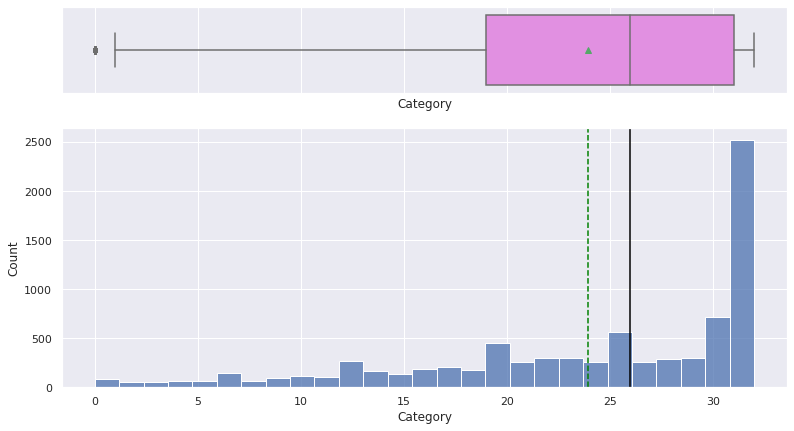

In [48]:
histogram_boxplot(play_store, "Category")

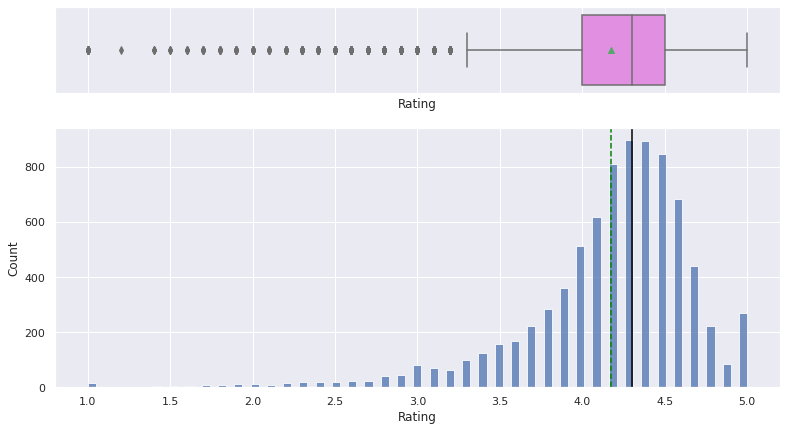

In [49]:
histogram_boxplot(play_store, "Rating")

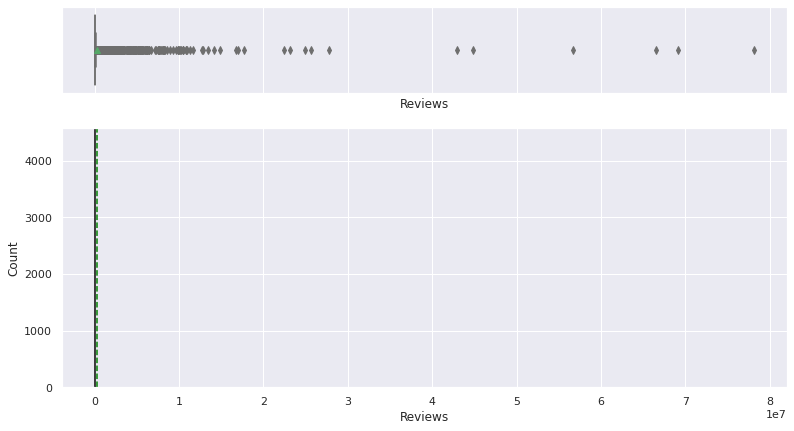

In [50]:
histogram_boxplot(play_store, "Reviews")

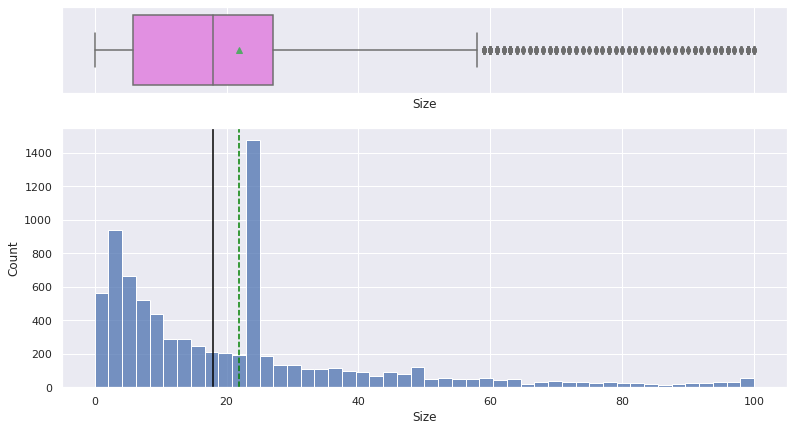

In [51]:
histogram_boxplot(play_store, "Size")

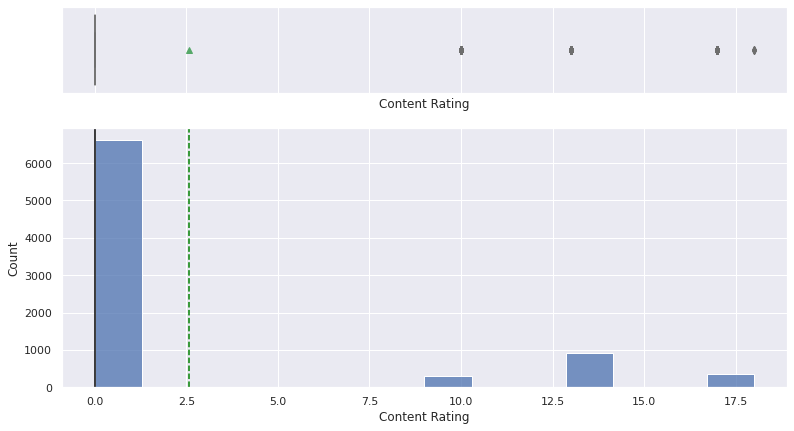

In [52]:
histogram_boxplot(play_store, "Content Rating")

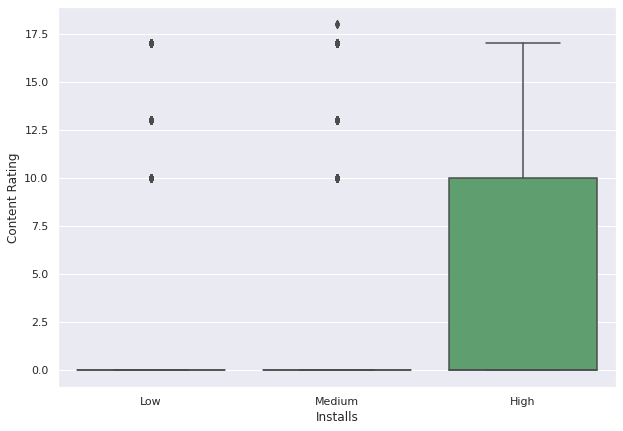

In [53]:
plt.figure(figsize=(10,7))
sns.boxplot(data=play_store, x="Installs",y="Content Rating")

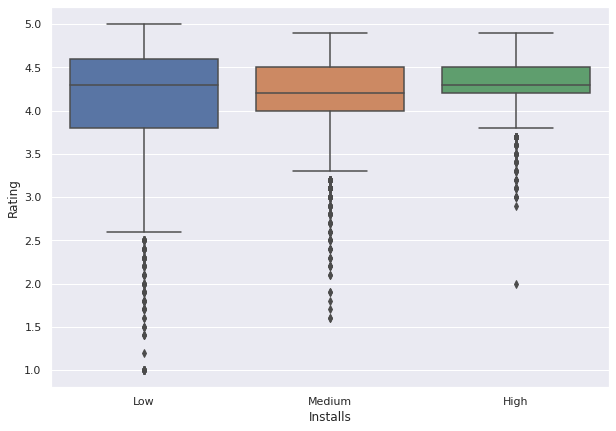

In [54]:
plt.figure(figsize=(10,7))
sns.boxplot(data=play_store, x="Installs",y="Rating")

- we can observe that apps with high downloads are highly rated and there are less outliers as compared to other low or medium installation apps

In [74]:
import scipy.stats as stats
import pylab
def plot_distribution(df, col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    df[col].hist()
    plt.subplot(1,3,2)
    stats.probplot(df[col], dist="norm", plot=pylab)
    plt.subplot(1,3,3)
    np.log(df[col]).hist()
    plt.show()

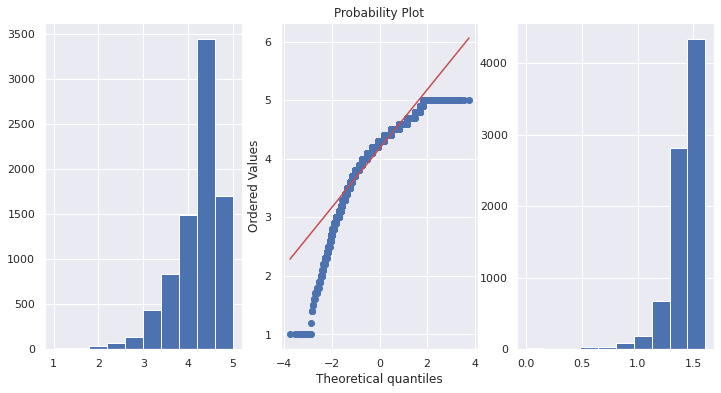

In [75]:
plot_distribution(play_store, 'Rating')

- We can observe that the ratings column is left skewed and it would also happen as most of the apps in the data are rated >3. Even the log transformation of the data did not vary the result much.

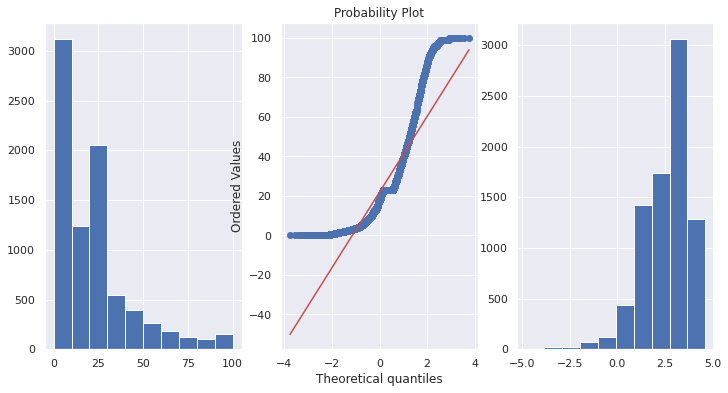

In [78]:
plot_distribution(play_store, 'Size')

- We can observe that the Size column is right skewed but the log transformation of data helped here in getting the column to gaussian distribution

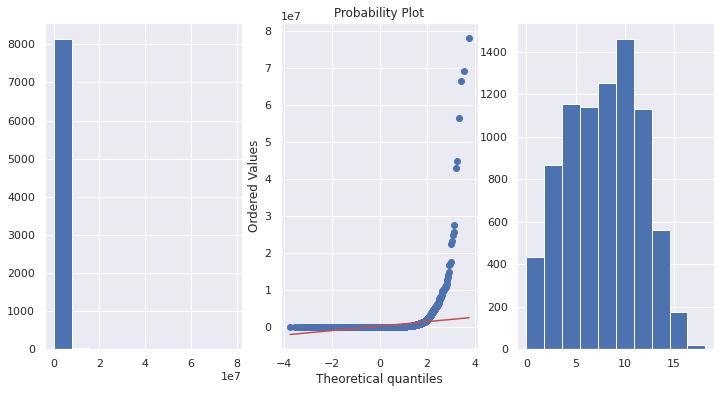

In [79]:
plot_distribution(play_store, 'Reviews')

- We can clearly observe that the log transformation has clearly helped the column to get into gaussian distribution

#### Bivariate Analysis

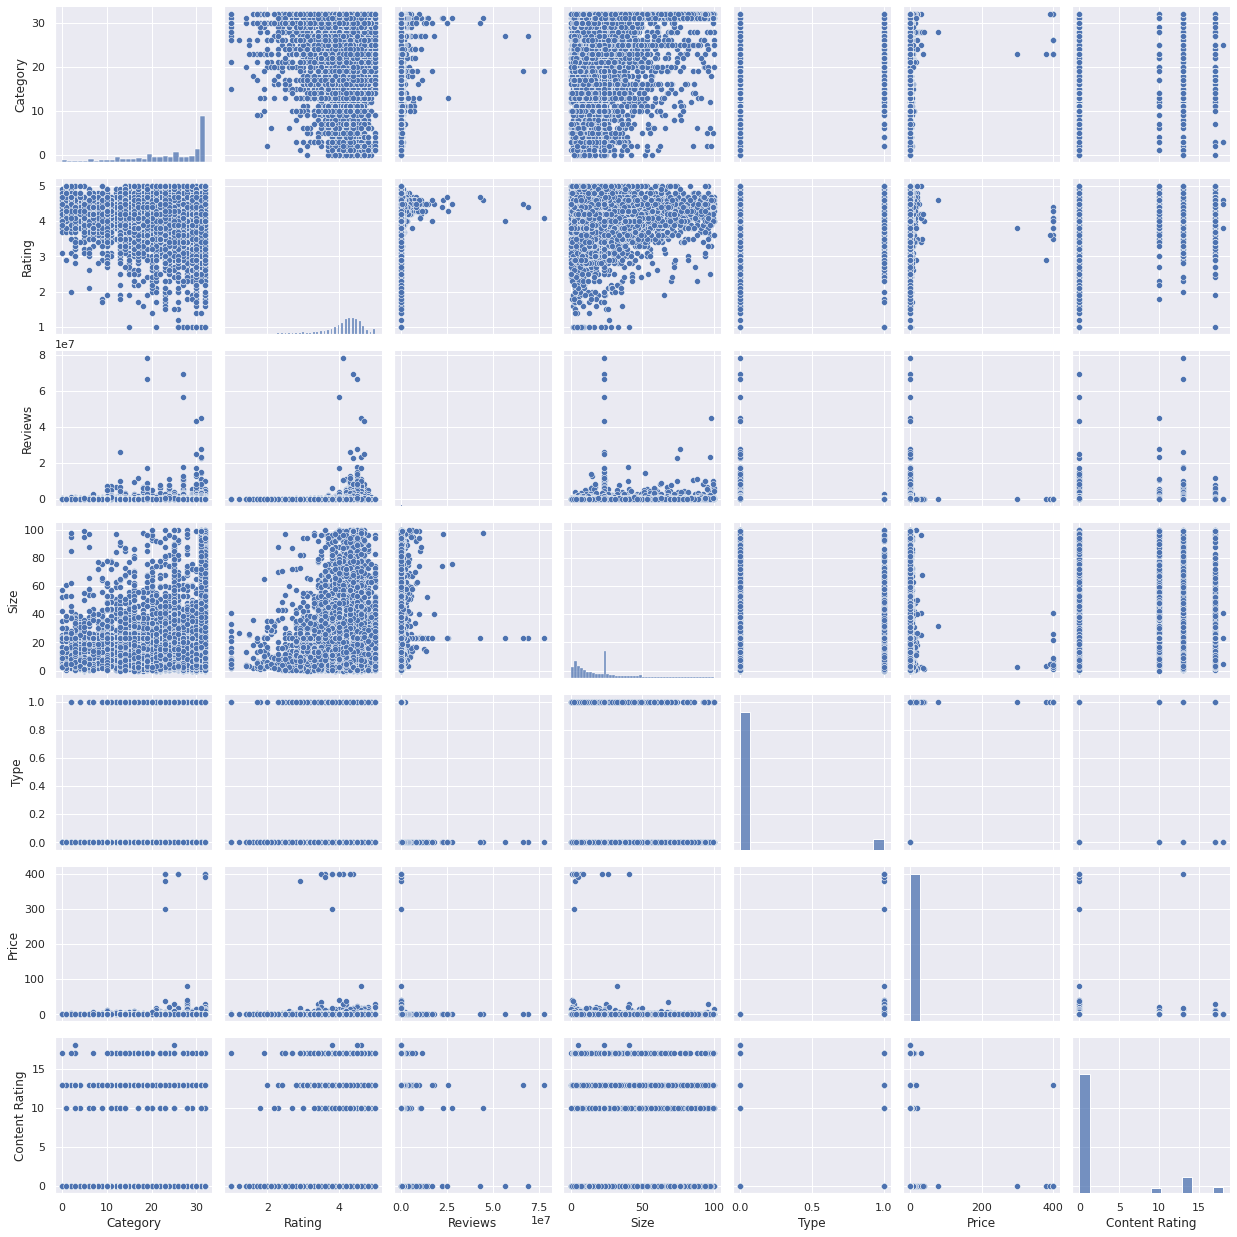

In [55]:
sns.pairplot(play_store)

<b> Does the size of app affect the number of installations or ratings?

Text(0.5, 1.04, 'Rating vs App Size')

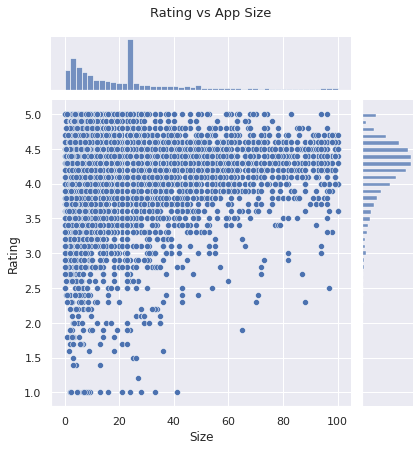

In [56]:
sns.set_style("darkgrid")
ax = sns.jointplot(play_store['Size'], play_store['Rating'])
ax.fig.suptitle("Rating vs App Size", y = 1.04, fontsize=13 )

- We can observe that most of the apps with larger size have good ratings
- Also some of the apps with lower sizes have lower ratings

<b> Effect of app price on rating and installations

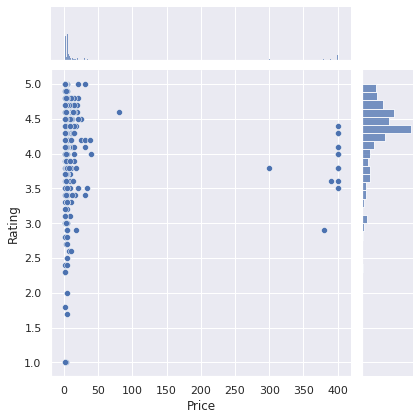

In [57]:
paid_apps = play_store[play_store.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

- We can observe that most of the high paid apps have higher rating and even most of the free apps are also rated well so there is not much differentiation in business that can be brought using the pricing strategy

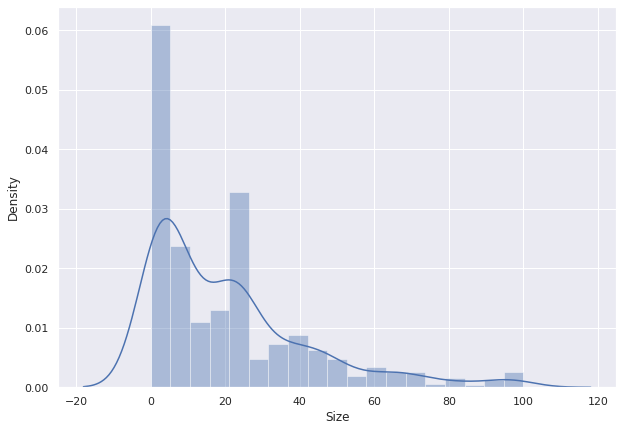

In [58]:
size_paid_apps = paid_apps['Size'].dropna()
plt.figure(figsize=(10,7))
sns.distplot(size_paid_apps)

- We can observe that the proce of most of the apps is >1 and <30

In [59]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Installs  High   Low  Medium   All
Rating                            
All       1978  2745    3467  8190
4.4        323   205     366   894
4.3        310   186     401   897
4.5        301   204     342   847
4.2        252   178     379   809
4.6        201   189     293   683
4.1        160   138     322   620
4.0        114   153     245   512
4.7         85   173     184   442
3.9         71   112     176   359
3.8         40   105     141   286
3.7         30    81     113   224
4.8         22   123      76   221
3.6         14    65      88   167
3.5         13    71      72   156
3.4         11    60      55   126
3.3          9    45      46   100
3.1          8    26      35    69
3.0          5    53      23    81
3.2          4    32      26    62
4.9          3    65      17    85
2.0          1    11       0    12
2.9          1    30      14    45
5.0          0   271       0   271
1.4          0     3       0     3
1.5          0     3       0     3
1.6          0     2

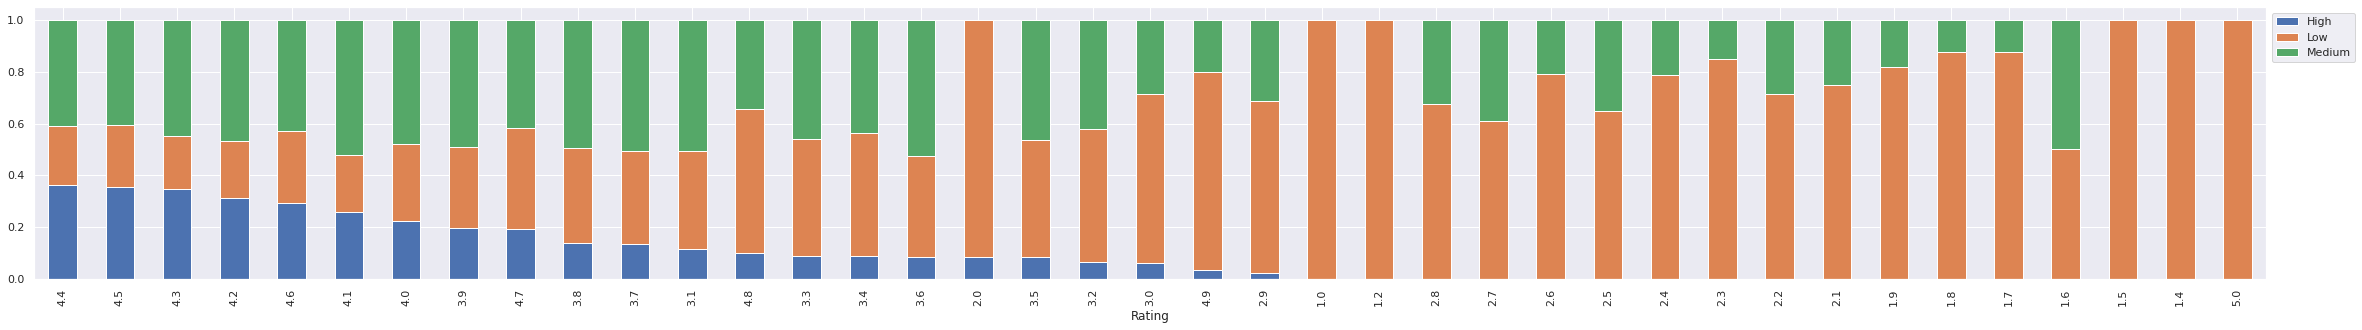

In [62]:
stacked_barplot(play_store, "Rating", "Installs")

- We can observe that mostly downloaded apps are rated between 4.0 to 4.5 so high ratings shows that apps have higher chances of being downloaded.

In [63]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4,4.1,159,19.0,Low,0,0.0,0
1,Coloring book moana,4,3.9,967,14.0,Medium,0,0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4,4.7,87510,8.7,High,0,0.0,0
3,Sketch - Draw & Paint,4,4.5,215644,25.0,High,0,0.0,13
4,Pixel Draw - Number Art Coloring Book,4,4.3,967,2.8,Medium,0,0.0,0


Installs        High   Low  Medium   All
Content Rating                          
All             1978  2745    3467  8190
0               1463  2416    2734  6613
13               320   192     400   912
10               102    50     153   305
17                93    87     177   357
18                 0     0       3     3
------------------------------------------------------------------------------------------------------------------------


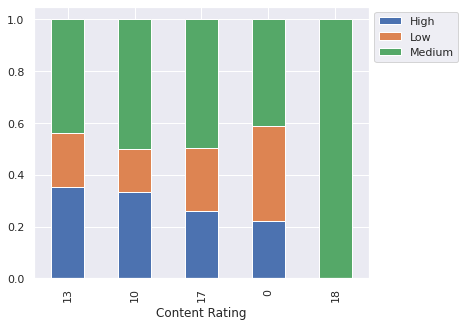

In [64]:
stacked_barplot(play_store, "Content Rating", "Installs")

- We can observe high instllations from the content category ratings of 13 and 10 so mostly young children or teenagers download most apps.

Installs  High   Low  Medium   All
Category                          
All       1978  2745    3467  8190
31         394   148     370   912
32         271   631     705  1607
30         173   272     272   717
24         123    49      91   263
27          99    78      79   256
29          91    87     123   301
25          74    74     112   260
18          72    32      76   180
19          67    58      78   203
22          66   127     103   296
20          56    59     129   244
16          55    62      70   187
13          51    41      56   148
11          50     1      51   102
23          40   134     127   301
17          37    74      93   204
26          36   139     127   302
21          35   146      82   263
14          33    70      66   169
10          29    43      46   118
12          28     7      83   118
9           23    14      57    94
7           21     7      44    72
15          14    54      66   134
8            9     5      48    62
4            8    18

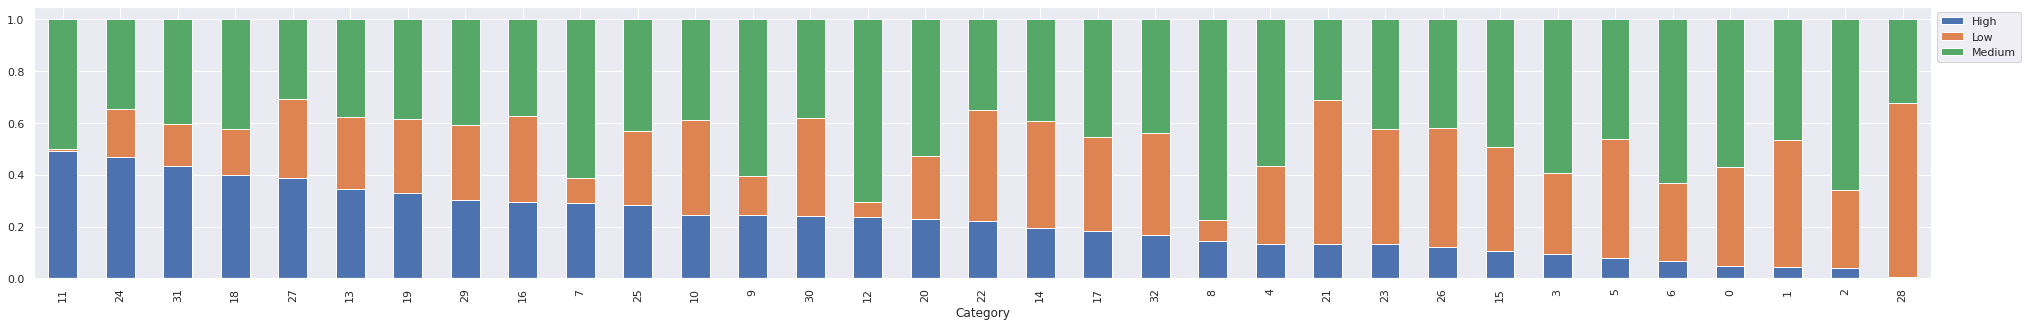

In [65]:
stacked_barplot(play_store, "Category", "Installs")

- We can observe high installations or downloads for category 11, 24 and 31.

Installs  High   Low  Medium   All
Type                              
All       1978  2745    3467  8190
0         1976  2297    3315  7588
1            2   448     152   602
------------------------------------------------------------------------------------------------------------------------


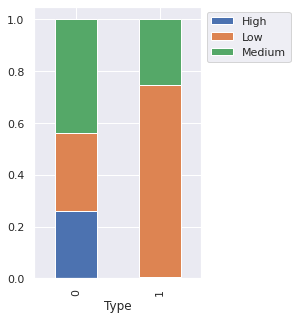

In [66]:
stacked_barplot(play_store, "Type", "Installs")

- We can observe the apps with higher installations are mostly free apps rather than paid apps

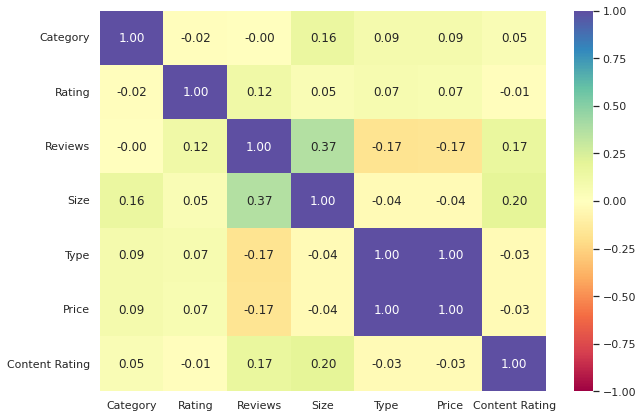

In [83]:
plt.figure(figsize=(10,7))
sns.heatmap(play_store.corr(method ='spearman'), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- We can observe that there is a strong relations between price and Type features but it needs to confirmed using a plot so that one variable from them can be removed so let us try to visualize correlation using pearson now.

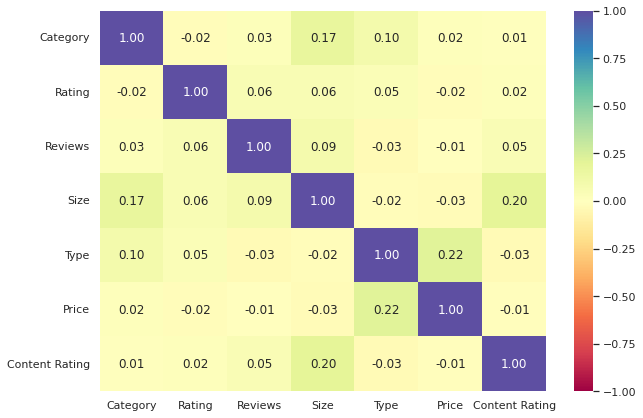

In [81]:
plt.figure(figsize=(10,7))
sns.heatmap(play_store.corr(method ='pearson'), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- We can observe that the columns are not very strongly correlated.
- There is some correlation between size and category, size and content ratings, price and type but this a very small correlation and can be avoided.<br>
Thus from both the correlation plots, we can observe that there is some slight relation between Price and Type and it is not completely related.

### Feature Engineering for Modeling

In [63]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4,4.1,159,19.0,Low,0,0.0,0
1,Coloring book moana,4,3.9,967,14.0,Medium,0,0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4,4.7,87510,8.7,High,0,0.0,0
3,Sketch - Draw & Paint,4,4.5,215644,25.0,High,0,0.0,13
4,Pixel Draw - Number Art Coloring Book,4,4.3,967,2.8,Medium,0,0.0,0


In [64]:
play_store.Installs.value_counts()

Medium    3467
Low       2745
High      1978
Name: Installs, dtype: int64

<b> The data seems to be somewhat balanced so it might not be required to use any oversampling or undersampling to handle data imbalance

As app names are unique so we will try to store them in a separate variable and drop it from the data

In [65]:
app_names=play_store['App']
play_store=play_store.drop('App',axis=1)

In [66]:
play_store.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,4,4.1,159,19.0,Low,0,0.0,0
1,4,3.9,967,14.0,Medium,0,0.0,0
2,4,4.7,87510,8.7,High,0,0.0,0
3,4,4.5,215644,25.0,High,0,0.0,13
4,4,4.3,967,2.8,Medium,0,0.0,0


<b>Train-Test split of data

In [67]:
X=play_store.drop('Installs',axis=1)
y=play_store['Installs'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

<b> Standard scaling of data

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<b> Encoding target column using labelbinarizer to Binarize labels in a one-vs-all fashion.

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.transform(y_test)

In [70]:
X_train

array([[ 0.97145401, -0.88951484, -0.13836013, ..., -0.28587344,
        -0.06083842, -0.47743966],
       [ 0.24632205,  1.17028189, -0.13974586, ..., -0.28587344,
        -0.06083842, -0.47743966],
       [-0.23709926, -0.14049785, -0.13928956, ..., -0.28587344,
        -0.06083842, -0.47743966],
       ...,
       [ 0.97145401,  0.23401065, -0.11021065, ..., -0.28587344,
        -0.06083842, -0.47743966],
       [ 0.60888803, -0.51500634, -0.13571812, ..., -0.28587344,
        -0.06083842, -0.47743966],
       [-2.04992918, -1.26402333, -0.13319396, ..., -0.28587344,
        -0.06083842, -0.47743966]])

In [71]:
y_train

array([2, 1, 2, ..., 0, 0, 2])

### Model Building

<b> Setting model evaluation criteria

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

In [73]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average='weighted')  # to compute Recall
    precision = precision_score(target, pred,average='weighted')  # to compute Precision
    f1 = f1_score(target, pred,average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [74]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3,3)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [75]:
from collections import Counter
from collections import OrderedDict

### Dictionary to store model and its accuracy

model_accuracy = OrderedDict()
### Dictionary to store model and its precision

model_precision = OrderedDict()
### Dictionary to store model and its recall

model_recall = OrderedDict()

In [76]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "accuracy"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_test, model.predict(X_test),average='weighted')
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 64.14880546869995
Bagging: 87.6221985431551
Random forest: 88.87365276783063
GBM: 89.22475122422718
Adaboost: 65.12401814359995
Xgboost: 89.16365923105141
dtree: 84.05073919448472

Validation Performance:

Logistic regression: 0.6361416361416361
Bagging: 0.8772893772893773
Random forest: 0.8888888888888888
GBM: 0.8894993894993894
Adaboost: 0.6782661782661783
Xgboost: 0.8864468864468864
dtree: 0.8461538461538461


<b> Tuning the top 3 models with best performance i.e. Random forest, XGBOOST and GBM

<b> Tuning GBM

In [77]:
%%time 

from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8937723665286683:
CPU times: user 5.57 s, sys: 429 ms, total: 5.99 s
Wall time: 4min 49s


In [78]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.5,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

In [79]:
# Checking model's performance on training set
gbm_train = model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
gbm_train

,Accuracy,Recall,Precision,F1
0,0.903999,0.903999,0.904762,0.904123


In [80]:
# Checking model's performance on validation set
gbm_test = model_performance_classification_sklearn(tuned_gbm, X_test, y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.887668,0.887668,0.890125,0.887781


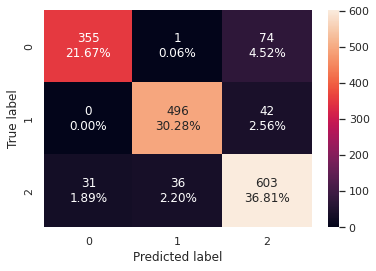

In [81]:
confusion_matrix_sklearn(tuned_gbm, X_test, y_test)

<b> Tuning Random Forest

In [82]:
%%time 

from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
#Creating pipeline
Model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 30, 40, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,100,200, 400]
 }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False} with CV score=0.89117694668134:
CPU times: user 4.07 s, sys: 247 ms, total: 4.32 s
Wall time: 3min 10s


In [83]:
tuned_rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=100,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split= 2,
    n_estimators= 200,
)
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200)

In [84]:
# Checking model's performance on training set
rf_train = model_performance_classification_sklearn(
    tuned_rf, X_train, y_train
)
rf_train

,Accuracy,Recall,Precision,F1
0,0.995116,0.995116,0.995118,0.995117


In [85]:
# Checking model's performance on validation set
rf_test = model_performance_classification_sklearn(tuned_rf, X_test, y_test)
rf_test

,Accuracy,Recall,Precision,F1
0,0.89011,0.89011,0.891997,0.890012


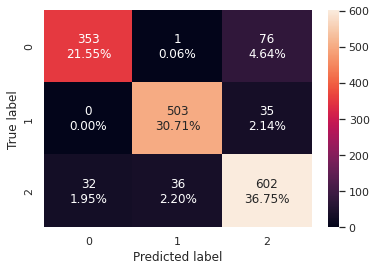

In [86]:
confusion_matrix_sklearn(tuned_rf, X_test, y_test)

<b> Tuning XGBoost

In [87]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 0} with CV score=nan:
CPU times: user 4.54 s, sys: 277 ms, total: 4.82 s
Wall time: 3min 31s


In [88]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=1,
    scale_pos_weight=5,
    n_estimators=200,
    learning_rate=0.01,
    gamma=0,
)
tuned_xgb.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.01, n_estimators=200,
              objective='multi:softprob', random_state=1, scale_pos_weight=5)

In [89]:
# Checking model's performance on train set
xgb_train = model_performance_classification_sklearn(
    tuned_xgb, X_train, y_train
)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.889347,0.889347,0.892345,0.889592


In [90]:
# Checking model's performance on validation set
xgb_test = model_performance_classification_sklearn(tuned_xgb, X_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1
0,0.880342,0.880342,0.884762,0.88065


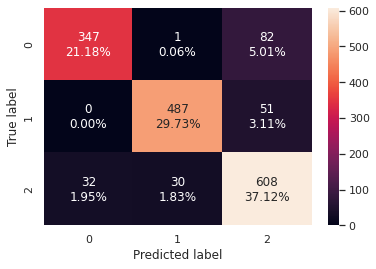

In [91]:
confusion_matrix_sklearn(tuned_xgb, X_test, y_test)

### Model Performance Evaluation

<b> Model performance evaluation on train data

In [92]:
#Training performance comparison
import pandas as pd
models_train_comparison = pd.concat(
    [
        xgb_train.T,
        gbm_train.T,
        rf_train.T,
    ], axis=1,
)
models_train_comparison.columns = [
    "XGBoost evaluated with train data",
    "Gradient boosting evaluated with train data",
    "Random Forest evaluated with train data",
]
print("Training performance comparison:")
models_train_comparison

Training performance comparison:


,XGBoost evaluated with train data,Gradient boosting evaluated with train data,Random Forest evaluated with train data
Accuracy,0.889347,0.903999,0.995116
Recall,0.889347,0.903999,0.995116
Precision,0.892345,0.904762,0.995118
F1,0.889592,0.904123,0.995117


In [94]:
#Training performance comparison
models_test_comparison = pd.concat(
    [
        xgb_test.T,
        gbm_test.T,
        rf_test.T,
    ], axis=1,
)
models_test_comparison.columns = [
    "XGBoost evaluated with test data",
    "Gradient boosting evaluated with test data",
    "Random Forest evaluated with test data",
]
print("Testing performance comparison:")
models_test_comparison

Testing performance comparison:


,XGBoost evaluated with test data,Gradient boosting evaluated with test data,Random Forest evaluated with test data
Accuracy,0.880342,0.887668,0.890110
Recall,0.880342,0.887668,0.890110
Precision,0.884762,0.890125,0.891997
F1,0.880650,0.887781,0.890012


From the models tuned on train data and evaluated on test data,
- We can observe that Random forest is the best model among the three with the accuracy of 89%, recall of 89%, f1-score of 89% and precision of 89%.


In [98]:
l=play_store.columns.drop('Installs')
l

Index(['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price',
       'Content Rating'],
      dtype='object')

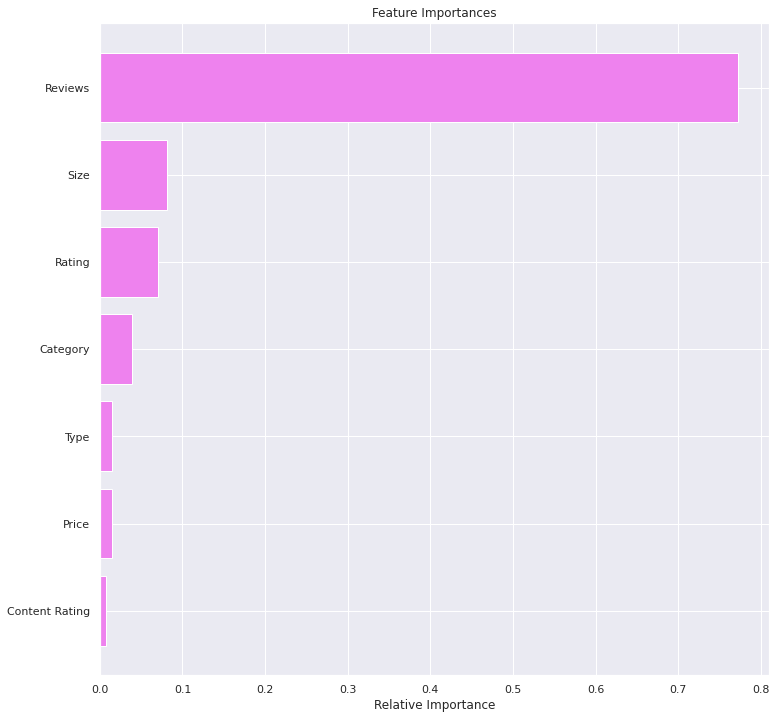

In [99]:
feature_names = ['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating']
importances = tuned_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can observe that reviews, size and rating are the top 3 most important features

### Conclusion and Recommendations

From this complete project,
- We observed that there is a high correlation between the category and the genres column so the one of the column needs to be dropped and genres column was complex with combined column names so it is removed from the data.
- Encoding of categories into numeric types is done using replace() function to avoid unrequired ordering of values.
- Columns like And version, current version and last updated date were removed from the data as they were unique and unrequired for analysis
- Univariate and Bivariate analysis has also helped in understanding the relationship between pricing strategy and ratings of apps
- Most of columns were independent and there was not any high correlation between them
- Target column `installs` is first converted into 3 type of categories and then it is encoded using label encoding for model building
- Several machine learning models were built on the data inlcuding simple logistic regression to bagging and boosting models
- Random forest, GBM and XGBoost had good performance over all other models so hyperparameter tuning is randomsearchCV is performed on these three models.
- Finally the best model was observed as `Random Forest` and feature importance is obtained using this model.
- We observed that reviews, size and rating were the top 3 features.